## This section will go through some basic R tools that will be used throughout the course







First I recommend that you work through [Rstudio](https://www.rstudio.com/) as it is a good enviorement for coding in R.

### basic tutorial

The thing that makes R very popular is the vast number of opensource packages that is aviable, and easily installed.
We will start with installing a couplte of packages that we will use:

In [1]:
install.packages("NHANES") # NHANES is survey data collected by the US National Center for Health Statistics

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Once the package is installed you can active it by using:

In [2]:
library(NHANES)

In [3]:
print(NHANES) #as NHANES ia a data set we can print it

         ID SurveyYr Gender Age AgeDecade AgeMonths    Race1    Race3
1     51624  2009_10   male  34     30-39       409    White     <NA>
2     51624  2009_10   male  34     30-39       409    White     <NA>
3     51624  2009_10   male  34     30-39       409    White     <NA>
4     51625  2009_10   male   4       0-9        49    Other     <NA>
5     51630  2009_10 female  49     40-49       596    White     <NA>
6     51638  2009_10   male   9       0-9       115    White     <NA>
7     51646  2009_10   male   8       0-9       101    White     <NA>
8     51647  2009_10 female  45     40-49       541    White     <NA>
9     51647  2009_10 female  45     40-49       541    White     <NA>
10    51647  2009_10 female  45     40-49       541    White     <NA>
11    51654  2009_10   male  66     60-69       795    White     <NA>
12    51656  2009_10   male  58     50-59       707    White     <NA>
13    51657  2009_10   male  54     50-59       654    White     <NA>
14    51659  2009_10

We will now collect the data used in the first lecture:

In [4]:
index <- NHANES$Age > 20 # pick all rows where age is greater then 20.
# the data contains NA (not a number which is annoying so lets remove them also)
index <- (NHANES$Age > 20) & (rowSums(is.na(NHANES[,c('Weight','Height')]))==0) 
data <- NHANES[index, c("Weight", "Height")] # now removed all data that has NA for either Weight or Height
print(data)

      Weight Height
1       87.4  164.7
2       87.4  164.7
3       87.4  164.7
5       86.7  168.4
8       75.7  166.7
9       75.7  166.7
10      75.7  166.7
11      68.0  169.5
12      78.4  181.9
13      74.7  169.4
15      57.5  148.1
16      84.1  177.8
18      93.8  181.3
19      74.6  169.9
21      57.5  170.7
22      57.5  170.7
23      51.0  157.1
24     113.9  177.1
25     113.9  177.1
26     117.3  180.9
28      79.2  174.7
29      86.5  165.9
30      86.5  165.9
31      62.8  152.0
32      64.9  175.8
33      54.3  145.1
34      54.3  145.1
35      87.6  173.4
36      82.1  163.8
37      82.1  163.8
45      78.2  175.3
46      50.7  154.8
47     134.3  169.6
48      60.3  173.0
49      86.3  178.6
50     103.5  166.5
51     103.5  166.5
54      84.6  182.0
55      72.7  170.6
56      51.6  151.0
58     106.0  167.2
59     106.0  167.2
60     106.0  167.2
63      69.9  165.5
64      64.9  149.7
65      64.9  149.7
66      87.8  164.4
67      87.8  164.4
68      87.8  164.4


Let us now explore the Height data and fit a Normal distribution to it.

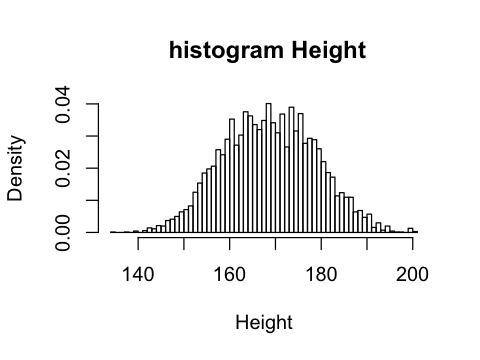

In [5]:
options(repr.plot.width=4, repr.plot.height=3) #adjust figure size for 
hist(data$Height, breaks = 80, main=" histogram Height", xlab='Height',freq=F)

The Normal distribution has two parameter: the mean $\mu$ and standard devation $\sigma$, thus they need to be fitted from the data:

In [6]:
mu    = mean(data$Height)
sigma = sd(data$Height)

Now lets examin the fit to the data by comparing the normal density 
$$f(\cdot; \mu,\sigma)= \frac{1}{2\pi \sigma} \exp\left(-\frac{1}{2\sigma^2} (\cdot - \mu) \right)^2$$ 
to the histogram:
1. The function seq gives a grid on which we evaulate the density on.
2. The normal density can be caculated using function dnorm.
3. Finally to draw the lines on top of the histogram we use line rather then plot

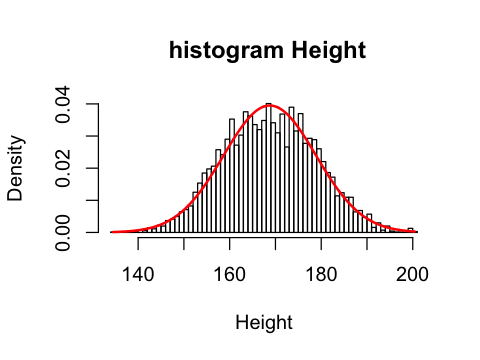

In [7]:
grid <- seq(min(data$Height), max(data$Height),length=2000) 
f <- dnorm(grid, mean= mu, sd = sigma)
hist(data$Height, breaks = 80, main=" histogram Height", xlab='Height',freq=F)
lines(grid, 
      f,
      col='red',
      lwd = 2)

The fit is ok, but not perfect as one can see that the normal density, has to much mass near the mean.

The probability that a person is between 160 to 180 cm can be caculated as follows:

In [8]:
mean(data$Height > 160 & data$Height < 180)

[1] 0.6522543

Let us compare this to this if we used the fitted Normal distribution instead:

Recall that 
$$\mathbb{P}( 160 < X < 180;\mu, \sigma) = \mathbb{P}(X < 180;\mu, \sigma) - \mathbb{P}(X < 160;\mu, \sigma)= \int_{160}^{180} f(x;\mu, \sigma) dx$$

In [9]:
x = seq(160,180, length = 2000)  
dx = (180-160)/2000
f <- dnorm(x, mean= mu, sd = sigma)
trapz <- sum(dx * f)
print(paste(" trapetz method = ", trapz, sep = "")) # formula (4.2) in the book

f_int <- integrate(function(x){dnorm(x, mean = mu, sd = sigma)},
          lower=160,
         upper = 180)[1]
print(paste(" R integration  = ", f_int, sep = "")) 
P180 = pnorm(180, mean = mu, sd = sigma)
P160 = pnorm(160, mean = mu, sd = sigma)
print(paste(" pnorm          = ", f_int, sep = "")) # pnorm is very usefull

[1] " trapetz method = 0.674141163516031"
[1] " R integration  = 0.67423641417363"
[1] " pnorm          = 0.67423641417363"


 # Going into two dimensions 
 
We will now study height and weight simultaneously. First we make a 2D histogram of the data. A very nice package for plotting is [ggplot2](http://ggplot2.org/); it has a steep learning curve but is very flexible.

In [9]:
install.packages("ggplot2")

Installing package into ‘/Users/jonaswallin/Library/R/3.3/library’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot download all files”Warning message:
“package ‘ggplot2’ is not available (for R version 3.3.1)”

In [13]:
library(ggplot2)
library(RColorBrewer)
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)

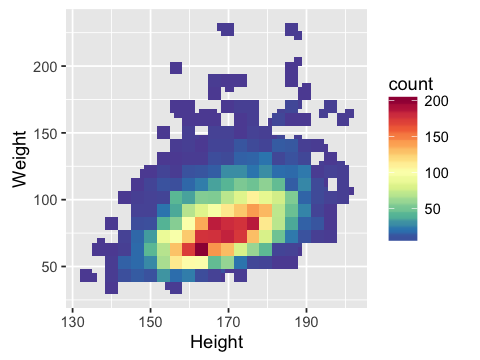

In [15]:
p <- ggplot(data, aes(Height, Weight))
p <- p + stat_bin2d() + stat_bin2d(bins=20) + scale_fill_gradientn(colours=r)
p <- p + ylab('Weight')
print(p)

Here one can see if one is a bit experience one can note that the some weights are to extreme to fit a normal distribution. 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


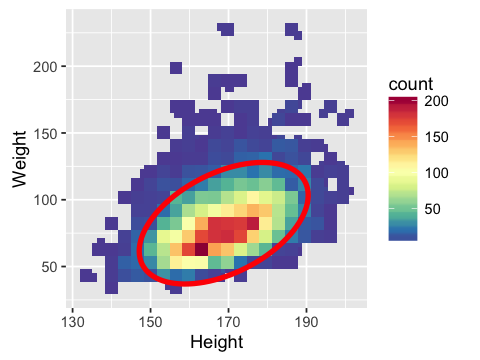

In [17]:
Sigma <- cov( data)
mu    <- colMeans(data)
install.packages("ellipse")
library(ellipse)
ellipse_data <- ellipse(Sigma, centre = mu, level = 0.9)
ellipse_data <- data.frame(Weight = ellipse_data[,"Weight"],
                           Height = ellipse_data[,"Height"])
p <- p + geom_path(aes( x= Height, y = Weight), data = ellipse_data, size=1.5, colour='red')

print( p)

In this case one can instead transform the data.

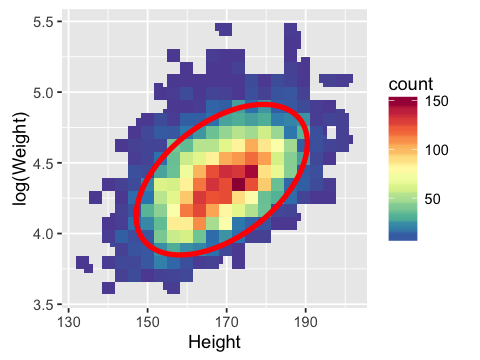

In [18]:
data$Weight <- log(data$Weight)
p <- ggplot(data, aes(Height, Weight))
p <- p + stat_bin2d() + stat_bin2d(bins=20) + scale_fill_gradientn(colours=r)
p <- p + ylab('log(Weight)')
Sigma <- cov( data)
mu    <- colMeans(data)
ellipse_data <- ellipse(Sigma, centre = mu, level = 0.9)
ellipse_data <- data.frame(Weight = ellipse_data[,"Weight"],
                           Height = ellipse_data[,"Height"])
p <- p + geom_path(aes( x= Height, y = Weight), data = ellipse_data, size=1.5, colour='red')

print( p)

## Conditional distributions

Now we want to predict the weight of a person that is 170 cm long, assuming log(weight) and height have multivariate Normal distribution. 


If we treat the height as indpendent $\left(f_{X,Y}(a,b)=f_X(a)f_Y(b) \right)$, then the best we can do is use $f_X(\cdot):$

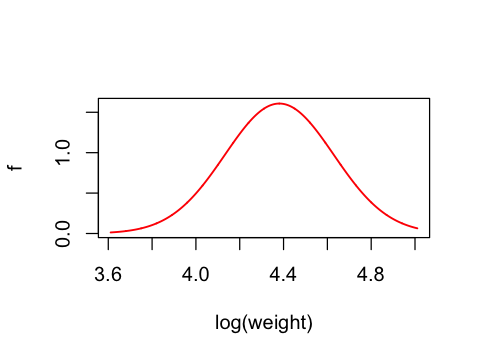

In [55]:
grid <- seq(min(data$Weight), log(150),length=2000) 
f <- dnorm(grid, mean= mu[1], sd = sqrt(Sigma[1, 1]))
plot(grid, 
      f,
     type= 'l',
      col='red',
      lwd = 1.5,
      xlab = 'log(weight)')

If we instead use the multivariate distribution, we can instead use the conditional distribution:
$$
f_{X|Y}(\cdot| Y = 180),
$$
Which can be done in R as follows:

In [59]:
install.packages("condMVNorm")
library(condMVNorm)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


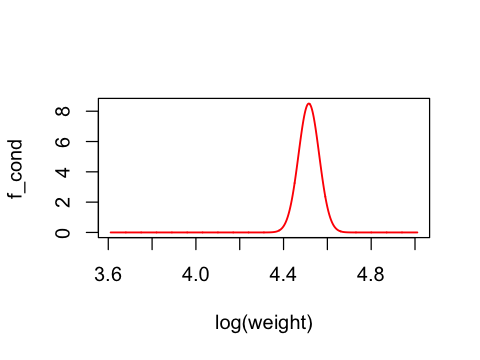

In [60]:
res <- condMVN(X.given       = 180,   # the value of the known index (190cm)
               mean          = mu,    # the mean parameter
               sigma         = Sigma, # the Covariance matrix
               dependent.ind = 1,     # which index we want to generate the density for  (Weight)
               given.ind     = 2)     # which index is known  (Height)
f_cond <- dnorm(grid, 
           mean= res$condMean, 
           sd = res$condVar)
plot(grid, 
     f_cond,
     type= 'l',
     col='red',
     lwd = 1.5,
     xlab = 'log(weight)')

Putting the two densities in the same figure, transforming the scale.

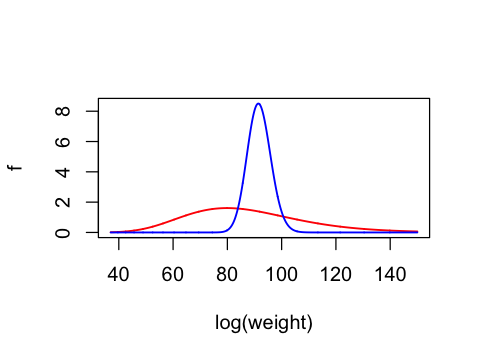

In [61]:
plot(exp(grid), 
     f,
     type= 'l',
     col='red',
     lwd = 1.5,
     xlab = 'log(weight)',
     ylim = c(0, max(c(f, f_cond))))
lines(exp(grid), 
     f_cond,
     col='blue',
     lwd = 1.5)